<a href="https://colab.research.google.com/github/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/blob/SPRC/SPRC_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

## to Install

In [24]:
# !pip install talib
# !pip install xgboost

# # For Colab
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib
# !pip install ta

## to Import

In [25]:
# Import the Libraries

# Data Manupulation
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime, timedelta

# Techinical Indicators
import talib

# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Standardization
from sklearn.preprocessing import MinMaxScaler

# Machine learning
# import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# Stock Data

## SPRC

### 5m

In [26]:
# SPRC 5m
stock_symbol = 'SPRC.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['5m']

# Create an empty DataFrame to store the results
SPRC_5m_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    SPRC_5m_df = pd.concat([SPRC_5m_df, data])

# Reset the index to get Date as a column
SPRC_5m_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(SPRC_5m_df)

# # Save the DataFrame to a CSV file
# SPRC_5m_df.to_csv('data_SPRC_5m.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,5m,2023-11-13 10:00:00+07:00,7.75,7.75,7.65,7.70,7.70,0
1,5m,2023-11-13 10:05:00+07:00,7.70,7.70,7.65,7.70,7.70,30200
2,5m,2023-11-13 10:10:00+07:00,7.70,7.70,7.60,7.65,7.65,248104
3,5m,2023-11-13 10:15:00+07:00,7.60,7.70,7.60,7.70,7.70,428700
4,5m,2023-11-13 10:20:00+07:00,7.70,7.70,7.70,7.70,7.70,2700
...,...,...,...,...,...,...,...,...
1981,5m,2024-01-09 16:05:00+07:00,8.20,8.20,8.15,8.20,8.20,72500
1982,5m,2024-01-09 16:10:00+07:00,8.20,8.20,8.10,8.15,8.15,1905800
1983,5m,2024-01-09 16:15:00+07:00,8.15,8.15,8.10,8.15,8.15,411300
1984,5m,2024-01-09 16:20:00+07:00,8.10,8.15,8.10,8.10,8.10,168629


### 15m

In [27]:
# SPRC 15m
stock_symbol = 'SPRC.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['15m']

# Create an empty DataFrame to store the results
SPRC_15m_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    SPRC_15m_df = pd.concat([SPRC_15m_df, data])

# Reset the index to get Date as a column
SPRC_15m_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(SPRC_15m_df)

# # Save the DataFrame to a CSV file
# SPRC_15m_df.to_csv('data_SPRC_15m.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,15m,2023-11-13 10:00:00,7.75,7.75,7.60,7.65,7.65,278304
1,15m,2023-11-13 10:15:00,7.60,7.70,7.60,7.65,7.65,604209
2,15m,2023-11-13 10:30:00,7.60,7.65,7.55,7.65,7.65,1756301
3,15m,2023-11-13 10:45:00,7.65,7.65,7.55,7.60,7.60,362500
4,15m,2023-11-13 11:00:00,7.55,7.60,7.55,7.60,7.60,1048500
...,...,...,...,...,...,...,...,...
696,15m,2024-01-09 15:15:00,8.35,8.40,8.35,8.35,8.35,240200
697,15m,2024-01-09 15:30:00,8.35,8.35,8.10,8.20,8.20,9962929
698,15m,2024-01-09 15:45:00,8.20,8.25,8.15,8.15,8.15,947317
699,15m,2024-01-09 16:00:00,8.15,8.20,8.10,8.15,8.15,2059209


In [28]:
#Add Y
# Shift the 'Close' column up by one row
SPRC_15m_df['Close_Shifted'] = SPRC_15m_df['Close'].shift(-1)

# Add a new column 'Signal' based on the condition
SPRC_15m_df['Signal'] = np.where(SPRC_15m_df['Close_Shifted'] > SPRC_15m_df['Close'], 2,
                        np.where(SPRC_15m_df['Close_Shifted'] < SPRC_15m_df['Close'], 1, 0))

# Display the resulting DataFrame with the new columns
display(SPRC_15m_df)

,Interval,Date,Open,High,Low,Close,Adj Close,Volume,Close_Shifted,Signal
0,15m,2023-11-13 10:00:00,7.75,7.75,7.60,7.65,7.65,278304,7.65,0
1,15m,2023-11-13 10:15:00,7.60,7.70,7.60,7.65,7.65,604209,7.65,0
2,15m,2023-11-13 10:30:00,7.60,7.65,7.55,7.65,7.65,1756301,7.60,1
3,15m,2023-11-13 10:45:00,7.65,7.65,7.55,7.60,7.60,362500,7.60,0
4,15m,2023-11-13 11:00:00,7.55,7.60,7.55,7.60,7.60,1048500,7.60,0
...,...,...,...,...,...,...,...,...,...,...
696,15m,2024-01-09 15:15:00,8.35,8.40,8.35,8.35,8.35,240200,8.20,1
697,15m,2024-01-09 15:30:00,8.35,8.35,8.10,8.20,8.20,9962929,8.15,1
698,15m,2024-01-09 15:45:00,8.20,8.25,8.15,8.15,8.15,947317,8.15,0
699,15m,2024-01-09 16:00:00,8.15,8.20,8.10,8.15,8.15,2059209,8.15,0


# Features Data

## SET100

In [29]:
# SET100 5m
stock_symbol = 'BSET100.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['5m']

# Create an empty DataFrame to store the results
SET100_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    SET100_df = pd.concat([SET100_df, data])

# Reset the index to get Date as a column
SET100_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(SET100_df)

# # Save the DataFrame to a CSV file
# SET100_df.to_csv('data_SET100.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,5m,2023-11-13 10:00:00+07:00,9.05,9.06,9.05,9.05,9.05,0
1,5m,2023-11-13 10:05:00+07:00,9.05,9.05,9.05,9.05,9.05,200
2,5m,2023-11-13 10:15:00+07:00,9.05,9.05,9.05,9.05,9.05,222
3,5m,2023-11-13 10:30:00+07:00,9.03,9.03,9.03,9.03,9.03,100
4,5m,2023-11-13 10:35:00+07:00,9.03,9.03,9.03,9.03,9.03,115
...,...,...,...,...,...,...,...,...
553,5m,2024-01-09 15:15:00+07:00,9.19,9.19,9.19,9.19,9.19,395
554,5m,2024-01-09 15:40:00+07:00,9.19,9.19,9.19,9.19,9.19,200
555,5m,2024-01-09 15:45:00+07:00,9.19,9.19,9.19,9.19,9.19,100
556,5m,2024-01-09 16:20:00+07:00,9.19,9.19,9.19,9.19,9.19,500


## SET50

In [30]:
# SET50 5m
stock_symbol = 'TDEX.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['5m']

# Create an empty DataFrame to store the results
SET50_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    SET50_df = pd.concat([SET50_df, data])

# Reset the index to get Date as a column
SET50_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(SET50_df)

# # Save the DataFrame to a CSV file
# SET50_df.to_csv('data_SET50.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,5m,2023-11-13 10:00:00+07:00,8.47,8.47,8.45,8.46,8.46,0
1,5m,2023-11-13 10:05:00+07:00,8.45,8.45,8.44,8.44,8.44,30085
2,5m,2023-11-13 10:10:00+07:00,8.44,8.45,8.44,8.45,8.45,7709
3,5m,2023-11-13 10:15:00+07:00,8.44,8.45,8.44,8.45,8.45,0
4,5m,2023-11-13 10:20:00+07:00,8.45,8.45,8.44,8.45,8.45,2600
...,...,...,...,...,...,...,...,...
1814,5m,2024-01-09 16:00:00+07:00,8.56,8.56,8.55,8.56,8.56,300
1815,5m,2024-01-09 16:05:00+07:00,8.56,8.56,8.55,8.55,8.55,300
1816,5m,2024-01-09 16:10:00+07:00,8.56,8.56,8.55,8.56,8.56,2720
1817,5m,2024-01-09 16:15:00+07:00,8.55,8.55,8.55,8.55,8.55,1200


In [31]:
# # Gold 15m
# stock_symbol = 'GC=F'
# end_date = datetime.today().strftime('%Y-%m-%d')
# start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
# intervals = ['15m']

# # Create an empty DataFrame to store the results
# GOLD_df = pd.DataFrame()

# # Loop through each interval and append data to the DataFrame
# for interval in intervals:
#     data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
#     # Add a level to the MultiIndex for the interval
#     data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
#     GOLD_df = pd.concat([GOLD_df, data])

# # Reset the index to get Date as a column
# GOLD_df.reset_index(inplace=True)

# # Display the resulting DataFrame
# display(GOLD_df)

# # # Save the DataFrame to a CSV file
# # GOLD_df.to_csv('data_GOLD.csv', index=False)

## Resource Index

In [32]:
# Resource Index 5m
stock_symbol = '^RESOURC.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['5m']

# Create an empty DataFrame to store the results
RESOURCE_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    RESOURCE_df = pd.concat([RESOURCE_df, data])

# Reset the index to get Date as a column
RESOURCE_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(RESOURCE_df)

# # Save the DataFrame to a CSV file
# RESOURCE_df.to_csv('data_RESOURC.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,5m,2023-11-13 10:00:00+07:00,176.440002,176.570007,175.910004,176.339996,176.339996,0
1,5m,2023-11-13 10:05:00+07:00,176.320007,176.470001,175.770004,176.380005,176.380005,0
2,5m,2023-11-13 10:10:00+07:00,176.029999,176.619995,176.029999,176.139999,176.139999,0
3,5m,2023-11-13 10:15:00+07:00,176.199997,176.850006,176.199997,176.820007,176.820007,0
4,5m,2023-11-13 10:20:00+07:00,176.800003,176.880005,176.410004,176.410004,176.410004,0
...,...,...,...,...,...,...,...,...
2065,5m,2024-01-09 16:05:00+07:00,179.850006,179.940002,179.410004,179.580002,179.580002,0
2066,5m,2024-01-09 16:10:00+07:00,179.529999,180.130005,179.369995,179.479996,179.479996,0
2067,5m,2024-01-09 16:15:00+07:00,179.850006,179.970001,179.389999,179.649994,179.649994,0
2068,5m,2024-01-09 16:20:00+07:00,179.570007,180.000000,179.520004,179.580002,179.580002,0


## Energy Index

In [33]:
# Energy Index 5m
stock_symbol = '^ENERG.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['5m']

# Create an empty DataFrame to store the results
ENERGY_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    ENERGY_df = pd.concat([ENERGY_df, data])

# Reset the index to get Date as a column
ENERGY_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(ENERGY_df)

# # Save the DataFrame to a CSV file
# ENERGY_df.to_csv('data_ENERG.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,5m,2023-11-13 10:00:00+07:00,20124.869141,20139.490234,20063.859375,20112.839844,20112.839844,0
1,5m,2023-11-13 10:05:00+07:00,20111.179688,20128.289062,20048.380859,20117.800781,20117.800781,0
2,5m,2023-11-13 10:10:00+07:00,20077.789062,20145.689453,20077.789062,20090.550781,20090.550781,0
3,5m,2023-11-13 10:15:00+07:00,20097.279297,20171.660156,20097.279297,20167.740234,20167.740234,0
4,5m,2023-11-13 10:20:00+07:00,20165.609375,20175.150391,20121.529297,20121.529297,20121.529297,0
...,...,...,...,...,...,...,...,...
2065,5m,2024-01-09 16:05:00+07:00,20513.369141,20524.080078,20463.500000,20483.419922,20483.419922,0
2066,5m,2024-01-09 16:10:00+07:00,20477.160156,20545.679688,20458.759766,20471.439453,20471.439453,0
2067,5m,2024-01-09 16:15:00+07:00,20514.089844,20527.359375,20461.519531,20490.439453,20490.439453,0
2068,5m,2024-01-09 16:20:00+07:00,20481.269531,20530.740234,20475.519531,20482.429688,20482.429688,0


## TOP

In [34]:
# Energy Index 5m
stock_symbol = 'TOP.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['5m']

# Create an empty DataFrame to store the results
TOP_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    TOP_df = pd.concat([TOP_df, data])

# Reset the index to get Date as a column
TOP_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(TOP_df)

# # Save the DataFrame to a CSV file
# TOP_df.to_csv('data_TOP.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,5m,2023-11-13 10:00:00+07:00,47.00,47.00,46.75,46.75,46.75,0
1,5m,2023-11-13 10:05:00+07:00,47.00,47.00,46.75,47.00,47.00,129400
2,5m,2023-11-13 10:10:00+07:00,46.75,47.00,46.75,46.75,46.75,62702
3,5m,2023-11-13 10:15:00+07:00,47.00,47.25,46.75,47.25,47.25,511000
4,5m,2023-11-13 10:20:00+07:00,47.25,47.25,47.00,47.25,47.25,22100
...,...,...,...,...,...,...,...,...
2015,5m,2024-01-09 16:05:00+07:00,52.50,52.75,52.50,52.75,52.75,31000
2016,5m,2024-01-09 16:10:00+07:00,52.50,52.75,52.50,52.75,52.75,42145
2017,5m,2024-01-09 16:15:00+07:00,52.50,52.75,52.50,52.75,52.75,38761
2018,5m,2024-01-09 16:20:00+07:00,52.50,52.75,52.50,52.75,52.75,55300


## IRPC

In [35]:
# IRPC 5m
stock_symbol = 'IRPC.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['5m']

# Create an empty DataFrame to store the results
IRPC_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    IRPC_df = pd.concat([IRPC_df, data])

# Reset the index to get Date as a column
IRPC_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(IRPC_df)

# # Save the DataFrame to a CSV file
# IRPC_df.to_csv('data_IRPC.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,5m,2023-11-13 10:00:00+07:00,2.00,2.00,1.98,1.99,1.99,0
1,5m,2023-11-13 10:05:00+07:00,1.99,1.99,1.98,1.99,1.99,823247
2,5m,2023-11-13 10:10:00+07:00,1.99,1.99,1.98,1.99,1.99,529300
3,5m,2023-11-13 10:15:00+07:00,1.99,1.99,1.98,1.99,1.99,253200
4,5m,2023-11-13 10:20:00+07:00,1.99,2.00,1.99,2.00,2.00,3456700
...,...,...,...,...,...,...,...,...
2024,5m,2024-01-09 16:05:00+07:00,2.02,2.02,2.00,2.02,2.02,64450
2025,5m,2024-01-09 16:10:00+07:00,2.02,2.02,2.00,2.02,2.02,126800
2026,5m,2024-01-09 16:15:00+07:00,2.02,2.02,2.00,2.00,2.00,81000
2027,5m,2024-01-09 16:20:00+07:00,2.02,2.02,2.00,2.02,2.02,401007


# Read Files

## For Colab

In [36]:
# Main Stock
## SPRC
# SPRC_15m = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_SPRC_15m.csv')
# SPRC_5m = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_SPRC_5m.csv')


# # Features
# BRENT = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_BRENT.csv')
# CNY = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_CNY.csv')
# CRUDE = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_CRUDE.csv')
# ENERGY = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_ENERG.csv')
# GOLD = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_GOLD.csv')
# RESOURCE = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_RESOURC.csv')
# SET50 = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_SET50.csv')
# SET100 = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_SET100.csv')
# USD = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_USD.csv')

## For Local Workspace

In [37]:
# # Main Stock
# ## TISCO
# TISCO_15m = pd.read_csv('training_datasource/data_TISCO_15m.csv')
# TISCO_5m = pd.read_csv('training_datasource/data_TISCO_5m.csv')
# TISCO_2m = pd.read_csv('training_datasource/data_TISCO_2m.csv')
# TISCO_1m = pd.read_csv('training_datasource/data_TISCO_1m.csv')

# ## ERW
# ERW_15m = pd.read_csv('training_datasource/data_ERW_15m.csv')
# ERW_5m = pd.read_csv('training_datasource/data_ERW_5m.csv')
# ERW_2m = pd.read_csv('training_datasource/data_ERW_2m.csv')
# ERW_1m = pd.read_csv('training_datasource/data_ERW_1m.csv')

# ## SPRC
# SPRC_15m = pd.read_csv('training_datasource/data_SPRC_15m.csv')
# SPRC_5m = pd.read_csv('training_datasource/data_SPRC_5m.csv')
# SPRC_2m = pd.read_csv('training_datasource/data_SPRC_2m.csv')
# SPRC_1m = pd.read_csv('training_datasource/data_SPRC_1m.csv')

# # Features
# BANKING = pd.read_csv('training_datasource/data_BANKING.csv')
# BRENT = pd.read_csv('training_datasource/data_BRENT.csv')
# CNY = pd.read_csv('training_datasource/data_CNY.csv')
# CRUDE = pd.read_csv('training_datasource/data_CRUDE.csv')
# ENERGY = pd.read_csv('training_datasource/data_ENERG.csv')
# FINCIAL = pd.read_csv('training_datasource/data_FINCIAL.csv')
# GOLD = pd.read_csv('training_datasource/data_GOLD.csv')
# RESOURCE = pd.read_csv('training_datasource/data_RESOURC.csv')
# SERVICE = pd.read_csv('training_datasource/data_SERVICE.csv')
# SET50 = pd.read_csv('training_datasource/data_SET50.csv')
# SET100 = pd.read_csv('training_datasource/data_SET100.csv')
# TOURISM = pd.read_csv('training_datasource/data_TOURISM.csv')
# USD = pd.read_csv('training_datasource/data_USD.csv')

In [38]:
## SPRC
SPRC_15m = pd.read_csv('training_datasource/data_SPRC_15m.csv')
SPRC_5m = pd.read_csv('training_datasource/data_SPRC_5m.csv')

RESOURCE = pd.read_csv('training_datasource/data_RESOURC.csv')
ENERGY = pd.read_csv('training_datasource/data_ENERG.csv')
SET50 = pd.read_csv('training_datasource/data_SET50.csv')
SET100 = pd.read_csv('training_datasource/data_SET100.csv')
TOP = pd.read_csv('training_datasource/data_TOP.csv')
IRPC = pd.read_csv('training_datasource/data_IRPC.csv')

# Define Variables

In [39]:
## Add Diff Columns
#### Adjust data
SPRC_5m['Diff'] = SPRC_5m['Close'].shift(-1)
SPRC_5m['Diff'] = SPRC_5m['Diff'].fillna(SPRC_5m['Close'] - SPRC_5m['Open'])

In [69]:
## Set Signal Condition
SPRC_5m['Signal'] = np.where(SPRC_5m['Diff'] > SPRC_5m['Close'], 1, 0)

In [70]:
# Set Variables
# Set Y
sprc_signal = SPRC_5m['Signal']

# Reference date
ref_date = SPRC_5m['Date']

# Features (X)
# sprc15_close = SPRC_15m['Close']
# sprc15_vol = SPRC_15m['Volume']
sprc5_close = SPRC_5m['Close']
sprc5_vol = SPRC_5m['Volume']
sprc5_signal = SPRC_5m['Signal']
set100 = SET100['Close']
set50 = SET50['Close']
resource = RESOURCE['Close']
energy = ENERGY['Close']
top = TOP['Close']
irpc = IRPC['Close']

In [94]:
# Assuming all your data frames have the same index (timestamps)
keys = ['ref_date', 'sprc5_close', 'sprc5_vol', 'sprc5_signal', 'set100', 'set50', 'resource', 'energy', 'top', 'irpc']

# Assuming SPRC_5m has Datetime index
reference_index = ref_date.index

# Concatenate and reindex based on the reference index
merged_data_SPRC = pd.concat([ref_date, sprc5_close, sprc5_vol, sprc5_signal, set100, set50, resource, energy, top, irpc], axis=1, keys=keys).reindex(reference_index)

In [95]:
#Check Null values
nan_count = merged_data_SPRC.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

NaN (n) = 722:
ref_date           0
sprc5_close        0
sprc5_vol          0
sprc5_signal       0
set100          1374
set50            162
resource           0
energy             0
top                0
irpc               0
dtype: int64 



In [96]:
merged_data_SPRC[['set50', 'set100']] = merged_data_SPRC[['set50', 'set100']].fillna(merged_data_SPRC[['set50', 'set100']].median())

In [97]:
#Check Null values
nan_count = merged_data_SPRC.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

NaN (n) = 722:
ref_date        0
sprc5_close     0
sprc5_vol       0
sprc5_signal    0
set100          0
set50           0
resource        0
energy          0
top             0
irpc            0
dtype: int64 



## Technical Features

#### 15m

In [98]:
# SPRC EMA 5m
merged_data_SPRC['ref_date'] = pd.to_datetime(merged_data_SPRC['ref_date'])

# Set the index
merged_data_SPRC.set_index('ref_date', inplace=True)

# Set the window
merged_data_SPRC['ema_5m'] = talib.EMA(merged_data_SPRC['sprc5_close'], timeperiod=10)

# Calculate RSI for 'sprc5_close'
merged_data_SPRC['rsi_5m'] = talib.RSI(merged_data_SPRC['sprc5_close'], timeperiod=10)

# Calculate OBV for 'sprc5_close' and 'sprc5_volume'
merged_data_SPRC['obv_5m'] = talib.OBV(merged_data_SPRC['sprc5_close'], merged_data_SPRC['sprc5_vol'])

# Fill missing values in 'ema_5m' with the mean
merged_data_SPRC['ema_5m'].fillna(merged_data_SPRC['ema_5m'].mean(), inplace=True)
merged_data_SPRC['rsi_5m'].fillna(merged_data_SPRC['rsi_5m'].mean(), inplace=True)

# Now 'ema_15m' column contains the Exponential Moving Average values
print(merged_data_SPRC[['sprc5_close', 'ema_5m', 'rsi_5m', 'obv_5m']])

                           sprc5_close    ema_5m     rsi_5m    obv_5m
ref_date                                                             
2023-11-13 10:00:00+07:00         7.70  8.153267  50.913169       0.0
2023-11-13 10:05:00+07:00         7.70  8.153267  50.913169       0.0
2023-11-13 10:10:00+07:00         7.65  8.153267  50.913169 -248104.0
2023-11-13 10:15:00+07:00         7.70  8.153267  50.913169  180596.0
2023-11-13 10:20:00+07:00         7.70  8.153267  50.913169  180596.0
...                                ...       ...        ...       ...
2024-01-08 16:05:00+07:00         8.40  8.436402  44.831941 -317490.0
2024-01-08 16:10:00+07:00         8.45  8.438874  52.009689  183310.0
2024-01-08 16:15:00+07:00         8.45  8.440897  52.009689  183310.0
2024-01-08 16:20:00+07:00         8.45  8.442552  52.009689  183310.0
2024-01-08 16:25:00+07:00         8.45  8.443906  52.009689  183310.0

[1932 rows x 4 columns]


#### 5m

In [99]:
# # SPRC EMA 5m
# # Calculate EMA with a window of period (minute)
# merged_sprc_new['ema_5m'] = talib.EMA(merged_sprc_new['sprc5_close'], timeperiod=5)

# # Create Label (target variable)
# merged_sprc_new['target_ema_5m'] = np.where(merged_sprc_new['sprc5_close'].shift(-1) > merged_sprc_new['sprc5_close'], 1, 0)

# # Replace missing values in 'ema' with forward fill
# merged_sprc_new['ema_5m'].fillna(method='ffill', inplace=True)

# # Replace missing values in 'target' with forward fill (if any)
# merged_sprc_new['target_ema_5m'].fillna(method='ffill', inplace=True)


# #SPRC MACD 5m
# # Calculate MACD with forward-fill to handle NaN values
# merged_sprc_new['macd_5m'], merged_sprc_new['signal_macd_5m'], _ = talib.MACD(merged_sprc_new['sprc5_close'], fastperiod=12, slowperiod=26, signalperiod=9)
# merged_sprc_new[['macd_5m', 'signal_macd_5m']] = merged_sprc_new[['macd_5m', 'signal_macd_5m']].fillna(method='ffill')

# # Create Label (target variable)
# merged_sprc_new['target_macd_5m'] = np.where(merged_sprc_new['sprc5_close'].shift(-1) > merged_sprc_new['sprc5_close'], 1, 0)

# # Replace missing values in 'target' with forward fill (if any)
# merged_sprc_new['target_macd_5m'].fillna(method='ffill', inplace=True)


# # SPRC RSI 5m
# # Calculate Relative Strength Index (RSI) with a window of 14 periods
# merged_sprc_new['rsi_5'] = talib.RSI(merged_sprc_new['sprc5_close'], timeperiod=5)

# # Create Label (target variable)
# merged_sprc_new['target_rsi_5'] = np.where(merged_sprc_new['sprc5_close'].shift(-1) > merged_sprc_new['sprc5_close'], 1, 0)

# # Replace missing values in 'rsi' with forward fill
# merged_sprc_new['rsi_5'].fillna(method='ffill', inplace=True)

# # Replace missing values in 'target' with forward fill (if any)
# merged_sprc_new['target_rsi_5'].fillna(method='ffill', inplace=True)


# # SPRC OBV 5m
# merged_sprc_new['obv_5m'] = talib.OBV(SPRC_5m['Close'], SPRC_5m['Volume'])

# Data Exploration

## Check Normality & Outliers

In [100]:
column_names_list = list(merged_data_SPRC.columns)
print(column_names_list)

['sprc5_close', 'sprc5_vol', 'sprc5_signal', 'set100', 'set50', 'resource', 'energy', 'top', 'irpc', 'ema_5m', 'rsi_5m', 'obv_5m']


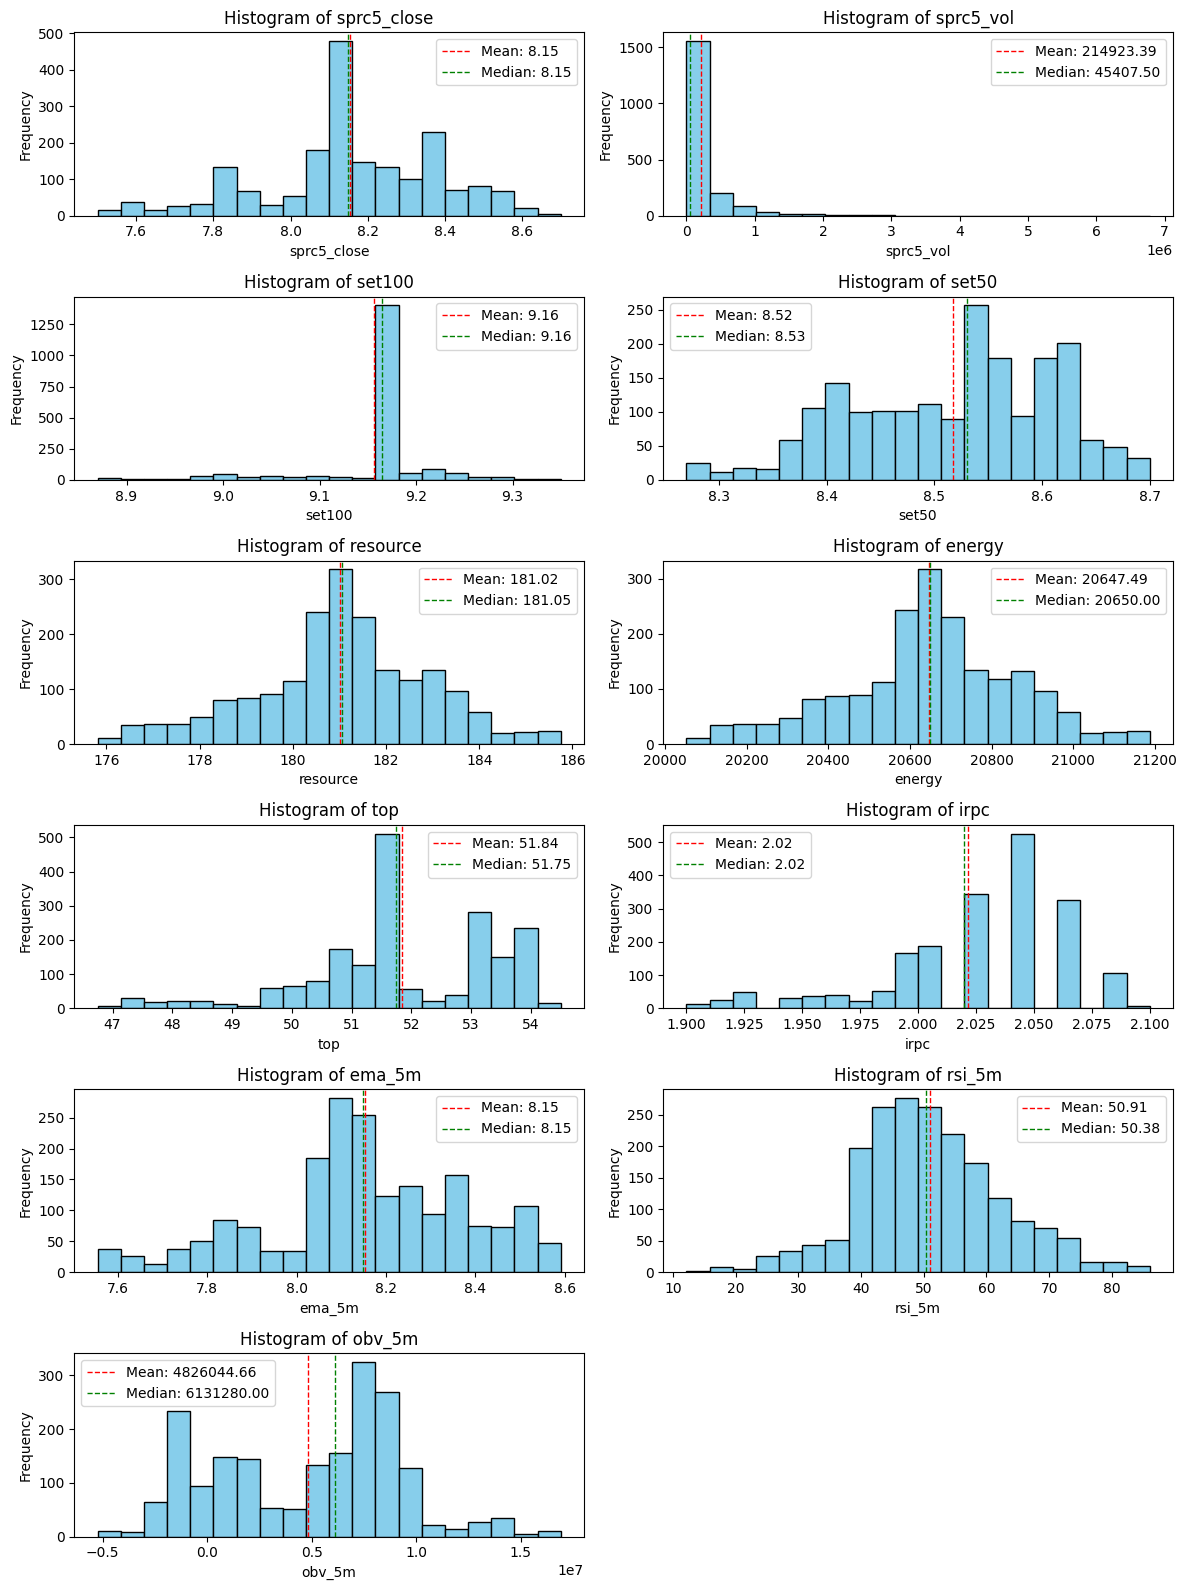

In [101]:
## Check Skewness
columns = ['sprc5_close', 'sprc5_vol', 'set100', 'set50', 'resource', 'energy', 'top', 'irpc', 'ema_5m', 'rsi_5m', 'obv_5m']

fig, axs = plt.subplots(6, 2, figsize=(12, 16))

# Flatten the 2D array of axes to simplify indexing
axs = axs.flatten()

for i, column in enumerate(columns):
    axs[i].hist(merged_data_SPRC[column], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {column}')

    mean_val = merged_data_SPRC[column].mean()
    median_val = merged_data_SPRC[column].median()

    axs[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
    axs[i].axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
    axs[i].legend()

# Hide any unused subplots
for i in range(len(columns), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

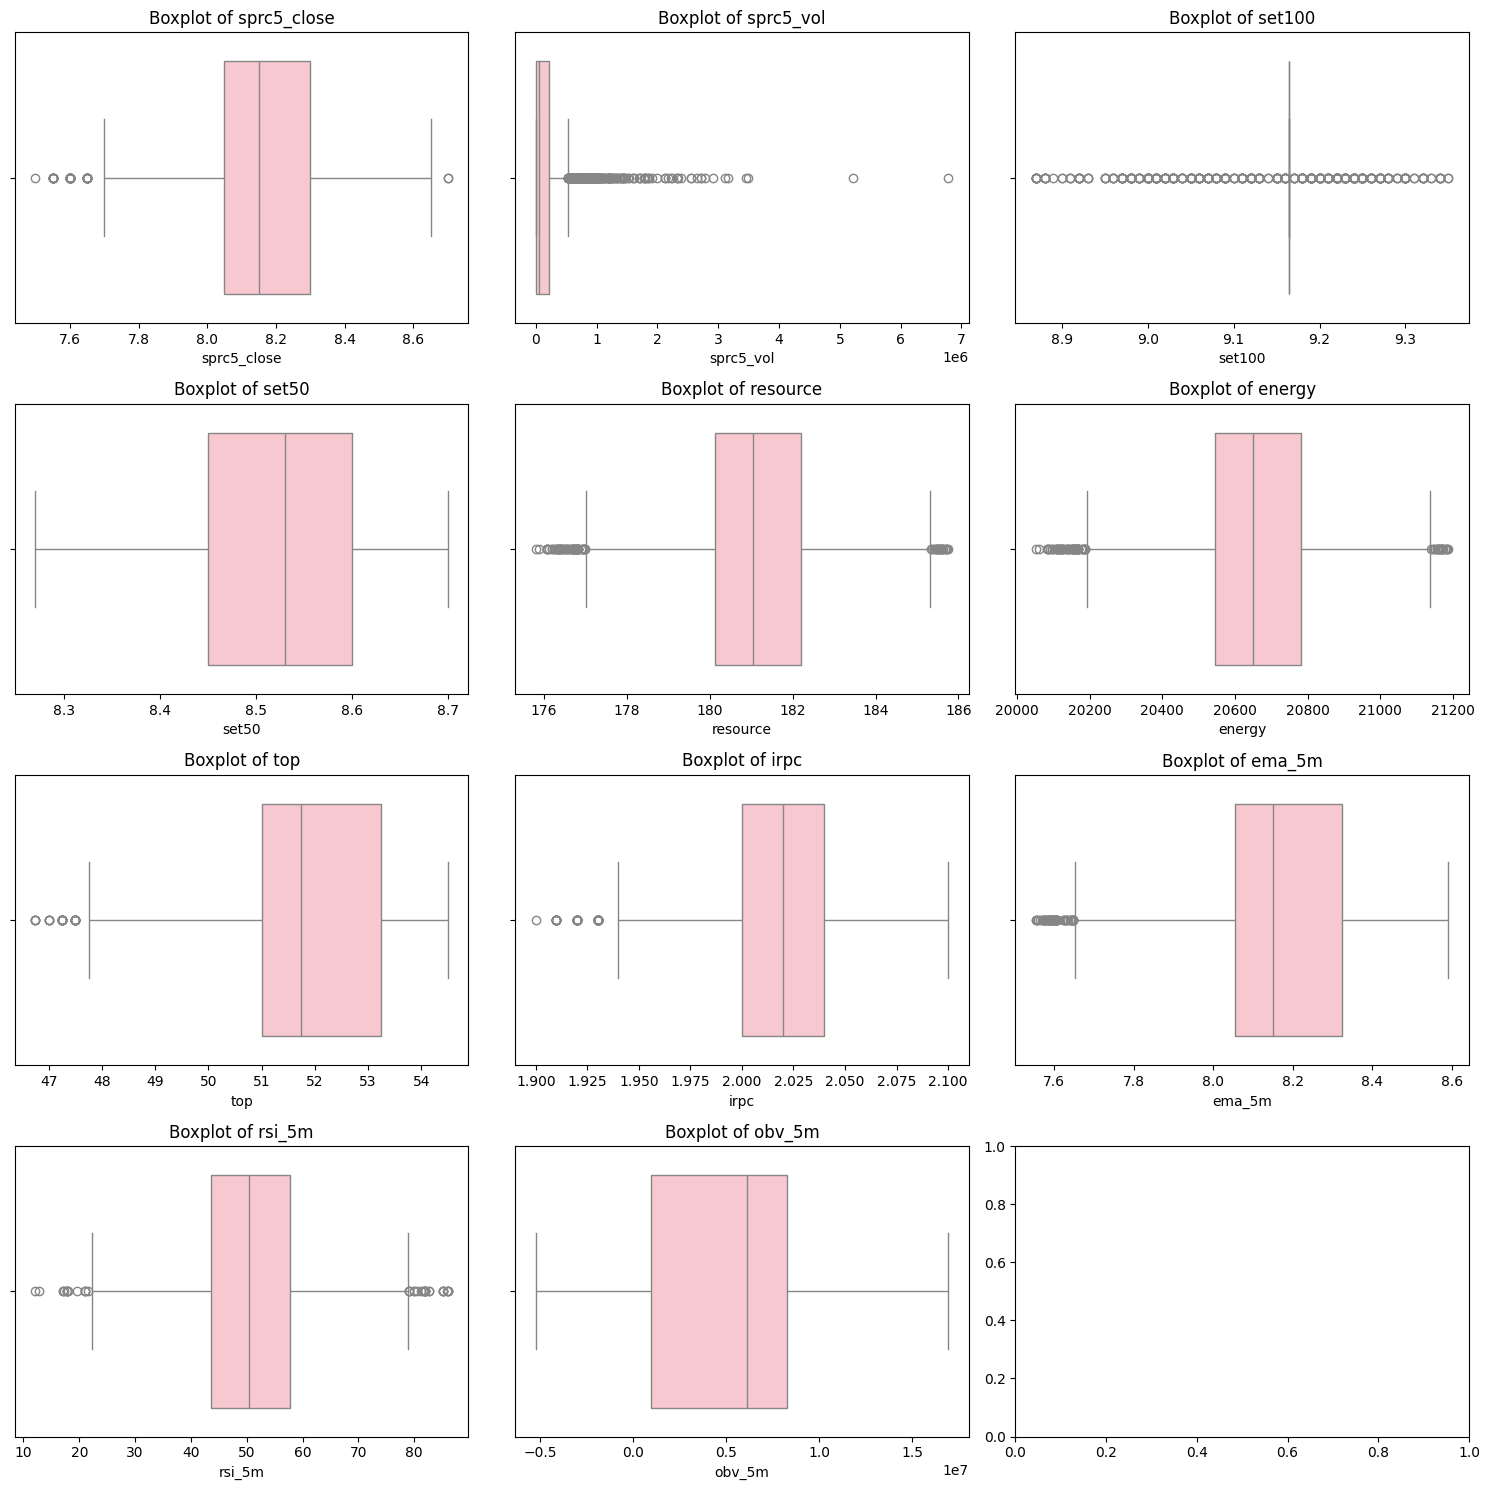

In [102]:
# Check Outliers
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

columns_to_test = ['sprc5_close', 'sprc5_vol', 'set100', 'set50', 'resource', 'energy', 'top', 'irpc', 'ema_5m', 'rsi_5m', 'obv_5m']

color = 'pink'

for i, column in enumerate(columns_to_test):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=merged_data_SPRC[column], color=color)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

## Cleansing Data

In [103]:
columns_to_fillna = ['sprc5_close', 'sprc5_vol', 'sprc5_signal', 'set100', 'set50', 'resource', 'energy', 'top', 'irpc', 'ema_5m', 'rsi_5m', 'obv_5m']


for column in columns_to_fillna:
    median_value = merged_data_SPRC[column].dropna()
    merged_data_SPRC[column].fillna(median_value, inplace=True)

In [104]:
columns_to_test = ['sprc5_close', 'sprc5_vol', 'sprc5_signal', 'set100', 'set50', 'resource', 'energy', 'top', 'irpc', 'ema_5m', 'rsi_5m', 'obv_5m']

for column_name in columns_to_test:
    df_tmp = merged_data_SPRC[[column_name]].dropna()

    print(f'{column_name} : ', end='')

    # Perform Anderson-Darling test for normality
    statistic, critical_values, significance_levels = stats.anderson(df_tmp[column_name], dist='norm')
    print(f'Statistic: {statistic:.3f}, Critical Values: {critical_values}, Significance Levels: {significance_levels}')

    # Check normality based on the 5% significance level
    if statistic >= critical_values[2]:
        print('Not normal')
    else:
        print('Normal')

    print('==========================================')

sprc5_close : Statistic: 14.230, Critical Values: [0.575 0.655 0.785 0.916 1.09 ], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
sprc5_vol : Statistic: 285.726, Critical Values: [0.575 0.655 0.785 0.916 1.09 ], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
sprc5_signal : Statistic: 515.891, Critical Values: [0.575 0.655 0.785 0.916 1.09 ], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
set100 : Statistic: 311.055, Critical Values: [0.575 0.655 0.785 0.916 1.09 ], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
set50 : Statistic: 17.197, Critical Values: [0.575 0.655 0.785 0.916 1.09 ], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
resource : Statistic: 9.440, Critical Values: [0.575 0.655 0.785 0.916 1.09 ], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
energy : Statistic: 9.452, Critical Values: [0.575 0.655 0.785 0.916 1.09 ], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
top : Statistic: 37.477, 

# Feature Selection

## SPRC

### Correlations

In [105]:
correlations = merged_data_SPRC.corr()['sprc5_close']

print("Correlation with sprc5_close:")
print(correlations)

print("\nInterpretation:")
for variable, correlation in correlations.items():
    if correlation > 0.7 or correlation < -0.7:
        print(f"The correlation between 'sprc5_close' and '{variable}' is strong ({correlation:.2f})")
    elif 0.3 <= correlation <= 0.7 or -0.7 <= correlation <= -0.3:
        print(f"The correlation between 'sprc5_close' and '{variable}' is moderate ({correlation:.2f})")
    elif 0.1 <= correlation <= 0.3 or -0.3 <= correlation <= -0.1:
        print(f"The correlation between 'sprc5_close' and '{variable}' is weak ({correlation:.2f})")
    else:
        print(f"There is no significant correlation between 'sprc5_close' and '{variable}' ({correlation:.2f})")

Correlation with sprc5_close:
sprc5_close     1.000000
sprc5_vol       0.027880
sprc5_signal   -0.011386
set100         -0.022893
set50           0.534666
resource        0.486639
energy          0.486699
top             0.708143
irpc            0.655336
ema_5m          0.978722
rsi_5m          0.199339
obv_5m          0.357965
Name: sprc5_close, dtype: float64

Interpretation:
The correlation between 'sprc5_close' and 'sprc5_close' is strong (1.00)
There is no significant correlation between 'sprc5_close' and 'sprc5_vol' (0.03)
There is no significant correlation between 'sprc5_close' and 'sprc5_signal' (-0.01)
There is no significant correlation between 'sprc5_close' and 'set100' (-0.02)
The correlation between 'sprc5_close' and 'set50' is moderate (0.53)
The correlation between 'sprc5_close' and 'resource' is moderate (0.49)
The correlation between 'sprc5_close' and 'energy' is moderate (0.49)
The correlation between 'sprc5_close' and 'top' is strong (0.71)
The correlation between '

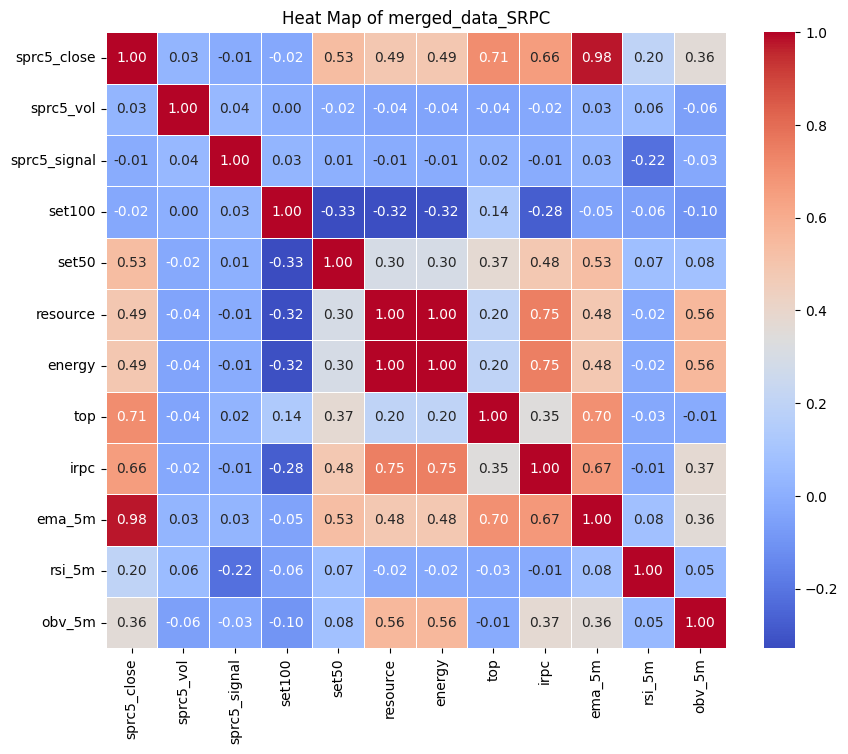

In [106]:
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data_SPRC.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heat Map of merged_data_SRPC')

plt.show()

### Standardization

In [107]:
# Specify the columns you want to normalize
columns_to_normalize = ['set50', 'resource', 'energy', 'top', 'irpc', 'ema_5m', 'obv_5m']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the specified columns
merged_data_SPRC[columns_to_normalize] = scaler.fit_transform(merged_data_SPRC[columns_to_normalize])

# Model Development (Training)

### SRPC

In [120]:
X_train_df = merged_data_SPRC[['set50', 'resource', 'energy', 'top', 'irpc', 'ema_5m', 'obv_5m']]
y_train_df = merged_data_SPRC['sprc5_signal']
y_train_df.dropna()

ref_date
2023-11-13 10:00:00+07:00    0.0
2023-11-13 10:05:00+07:00    0.0
2023-11-13 10:10:00+07:00    1.0
2023-11-13 10:15:00+07:00    0.0
2023-11-13 10:20:00+07:00    0.0
                            ... 
2024-01-08 16:05:00+07:00    1.0
2024-01-08 16:10:00+07:00    0.0
2024-01-08 16:15:00+07:00    0.0
2024-01-08 16:20:00+07:00    0.0
2024-01-08 16:25:00+07:00    0.0
Name: sprc5_signal, Length: 1932, dtype: float64

In [117]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state=123, stratify=y_train_df)


# set parameter
y_train = y_train.values.ravel()
k = 5
auc_scorer = make_scorer(roc_auc_score, greater_is_better = True, average= 'macro',multi_class='ovr',needs_proba=True)

# 1. Logistic regression
lgr = LogisticRegression(solver='liblinear')
param_grid_lgr = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid_search_lgr = GridSearchCV(estimator=lgr, param_grid=param_grid_lgr, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_lgr.fit(X_train, y_train)


# # 2. Extreme Gradient Boosting (XGBoost)
# xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
# param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.01, 0.001]}
# grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
# grid_search_xgb.fit(X_train, y_train)


# 3. SVM Support Vector Machine (SVM)
svm = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_svm.fit(X_train, y_train)


# 4. Random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid_rf = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_rf.fit(X_train, y_train)


# 5. Decision tree
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_dt.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

## Model Evaluation (Testing Model)

In [118]:
# Prediction
# Confusion Matrix and AUC Calculation

# 1. Logistic regression

y_prob_lgr = grid_search_lgr.predict_proba(X_test)
auc_lgr = roc_auc_score(y_test, y_prob_lgr, multi_class='ovr') * 100

y_pred_lgr = grid_search_lgr.predict(X_test)
conf_matrix_lgr = confusion_matrix(y_test, y_pred_lgr)

print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_lgr)
print(f"Logistic Regression AUC Score: {auc_lgr:.2f}%")


# # 2. Extreme Gradient Boosting (XGBoost)

# y_prob_xgb = grid_search_xgb.predict_proba(X_test)
# auc_xgb = roc_auc_score(y_test, y_prob_xgb, multi_class='ovr') * 100

# y_pred_xgb = grid_search_xgb.predict(X_test)
# conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# print("\nExtreme Gradient Boostingn Confusion Matrix:")
# print(conf_matrix_xgb)
# print(f"Extreme Gradient Boosting AUC Score: {auc_xgb:.2f}%")

# 3. SVM

y_prob_svm = grid_search_svm.predict_proba(X_test)
auc_svm = roc_auc_score(y_test, y_prob_svm, multi_class='ovr') * 100

y_pred_svm = grid_search_svm.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("\nSVM Confusion Matrix:")
print(conf_matrix_svm)
print(f"SVM AUC Score: {auc_svm:.2f}%")


# 4. Random forest

y_prob_rf = grid_search_rf.predict_proba(X_test)
auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr') * 100

y_pred_rf = grid_search_rf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom forest Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random forest AUC Score: {auc_rf:.2f}%")


# 5. Decision tree

y_prob_dt = grid_search_dt.predict_proba(X_test)
auc_dt = roc_auc_score(y_test, y_prob_dt, multi_class='ovr') * 100

y_pred_dt = grid_search_dt.predict(X_test)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("\nDecision tree Confusion Matrix:")
print(conf_matrix_dt)
print(f"Decision tree AUC Score: {auc_dt:.2f}%")

ValueError: y should be a 1d array, got an array of shape (387, 2) instead.

## Deployment (Prediction)

In [ ]:
# Select the best score Model

## Submission

In [ ]:
# Output
submission = pd.DataFrame({"Id":range(1,301),"Expected":result}) # To be revised
print(submission.shape)
print(submission.head())
submission.to_csv("submission.csv", index=False)